<div style="padding:20px;
            color:black;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#D6B2B1;
            overflow:hidden;
            font-weight:700">Customer Personality Analysis</div>

**DataSet Link : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis**

### `Import Libraries`

In [1]:
## main Libraries
import numpy as np
import pandas as pd

## Datetime , i will need it in feature engineering step
from datetime import date

## Vis. Libraries
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import init_notebook_mode, iplot
from yellowbrick.cluster import KElbowVisualizer

## preprocessing Libraries
from sklearn.preprocessing import LabelEncoder, RobustScaler

## decomposition
from sklearn.decomposition import PCA

## CLustering
from sklearn.cluster import KMeans ##, AgglomerativeClustering
## ignore warnings
import warnings
warnings.filterwarnings('ignore')

## setting some Libraries
pd.set_option('display.max_columns', None)
sns.set(rc={"figure.figsize" : [12,8]}, font_scale=1.2 , style='darkgrid')
## Set the figure and axes face color
sns.set(rc={"axes.facecolor": "#FFE4D9", "figure.facecolor": "#FFE4D9"})
## custom palette
custom_palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
sns.set_palette(custom_palette)
pio.templates.default = "ggplot2"
init_notebook_mode(connected=True)

### `Load Data`

In [2]:
df = pd.read_csv("output/01_data_overview.csv")

<a id="1"></a>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#D6B2B1;
            overflow:hidden;
            font-weight:700">2 <span style='color:#CDA63A'>|</span> Data Preprocessing
</div>

## <b>2.1 <span style='color:#682F2F'>Data Cleaning</span></b>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note : </b>Dt_Customer Column Data type is Object, I will Convert it to Datatime Datatype.</div>

In [4]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y", errors="coerce")
## 'coerce' invalid parsing will be set as NaT.

In [5]:
df["Dt_Customer"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


### `Null Values`

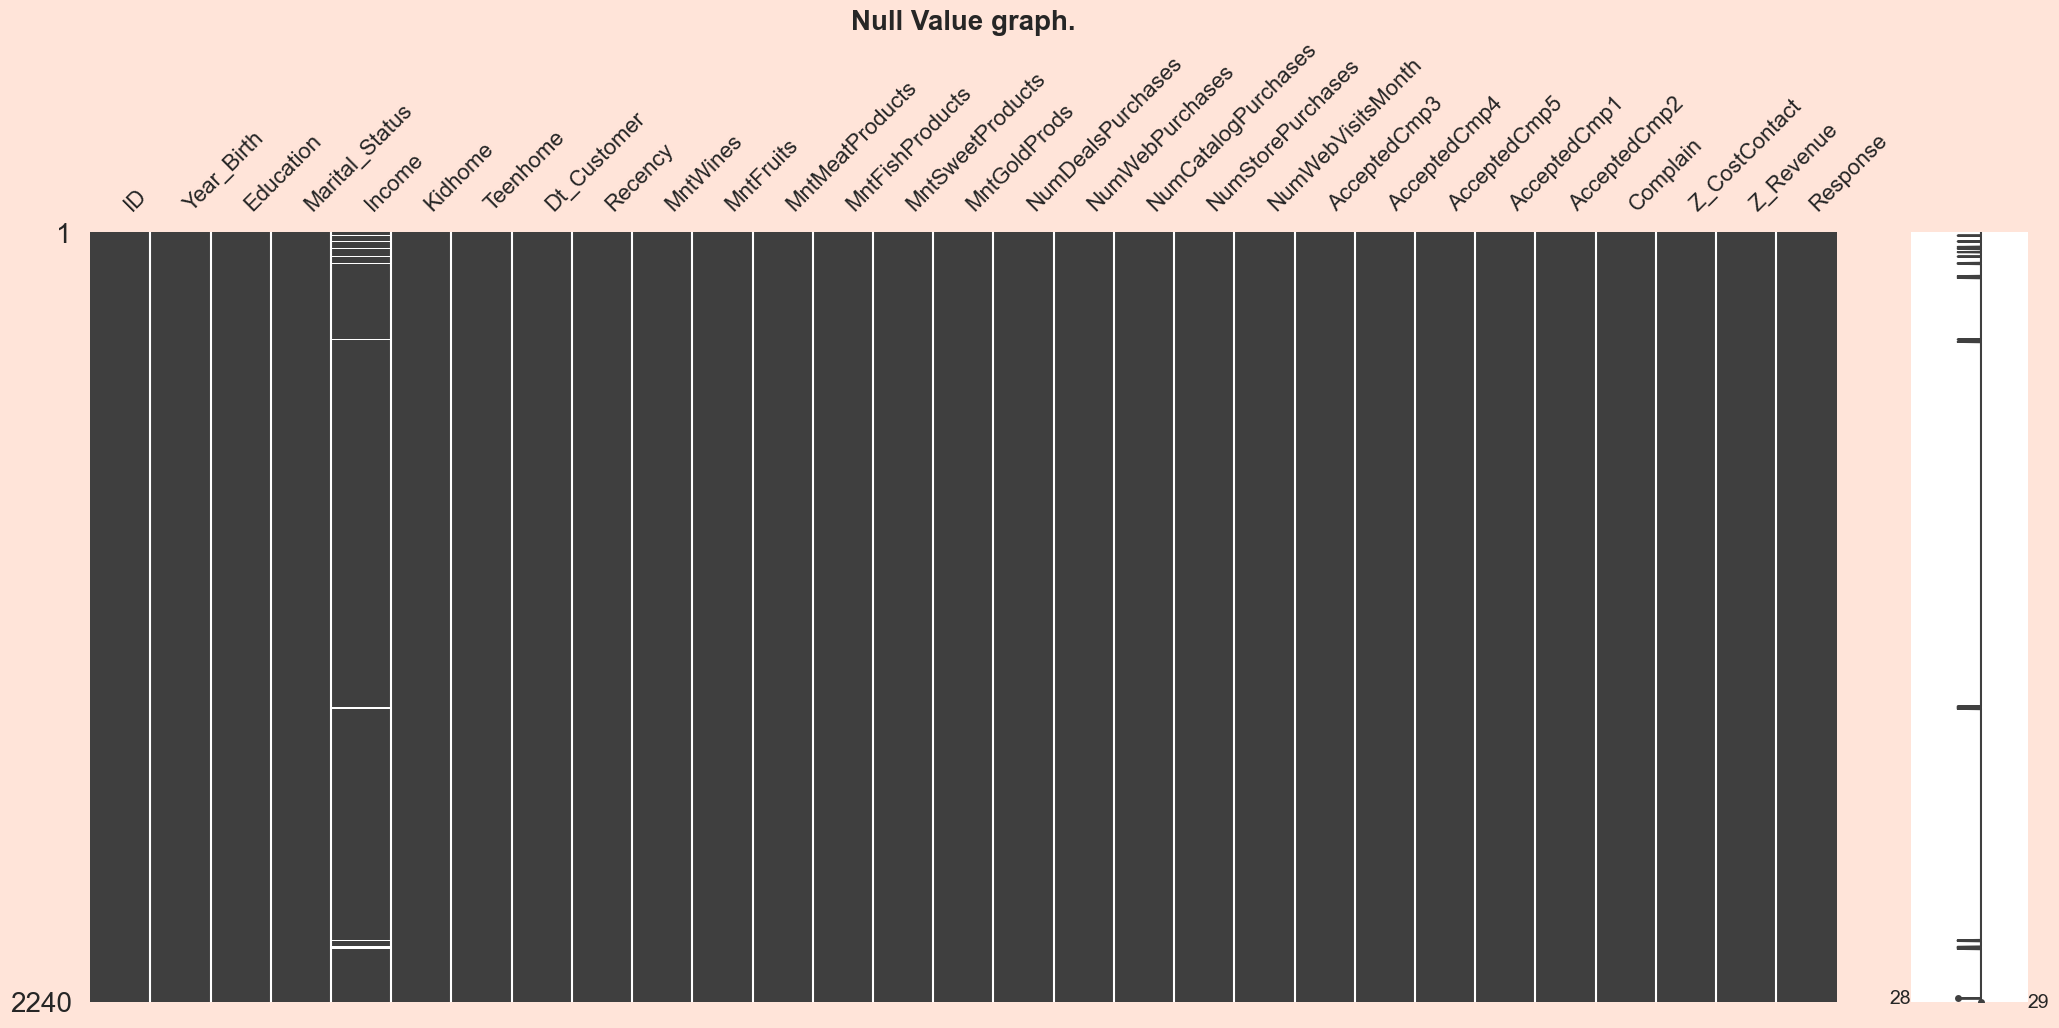

In [6]:
msno.matrix(df) 
plt.title("Null Value graph.", fontsize=20, weight="bold")
plt.show()

In [7]:
(df.isna().sum() / df.shape[0]) * 100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

##### `Income Column has Missing Values`

In [8]:
df["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

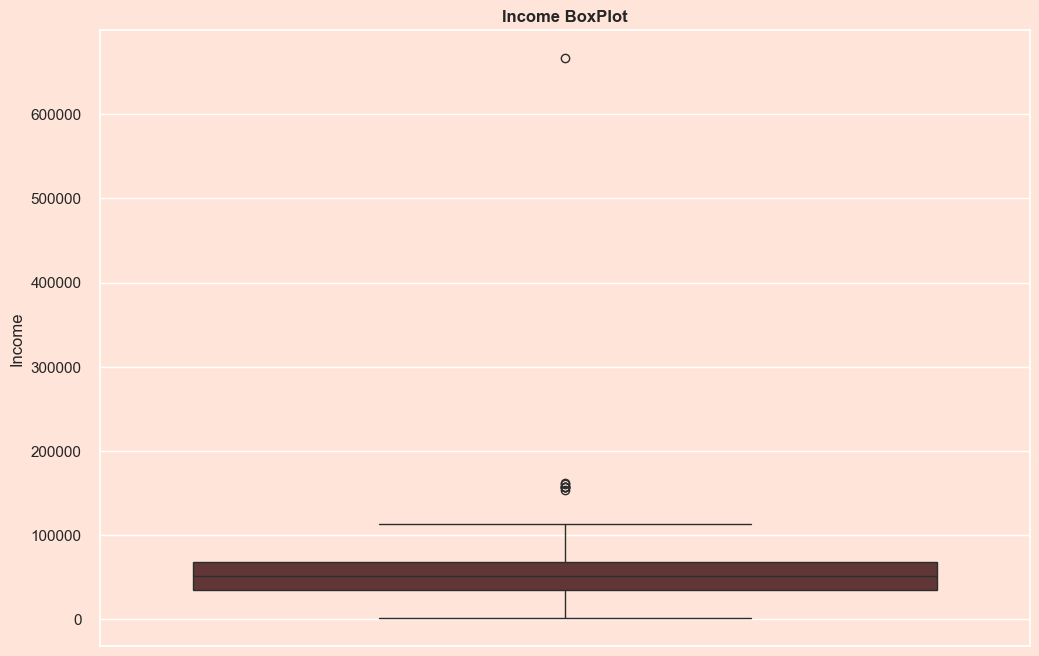

In [9]:
sns.boxplot(y="Income", data=df)
plt.title("Income BoxPlot", weight="bold")
plt.show()

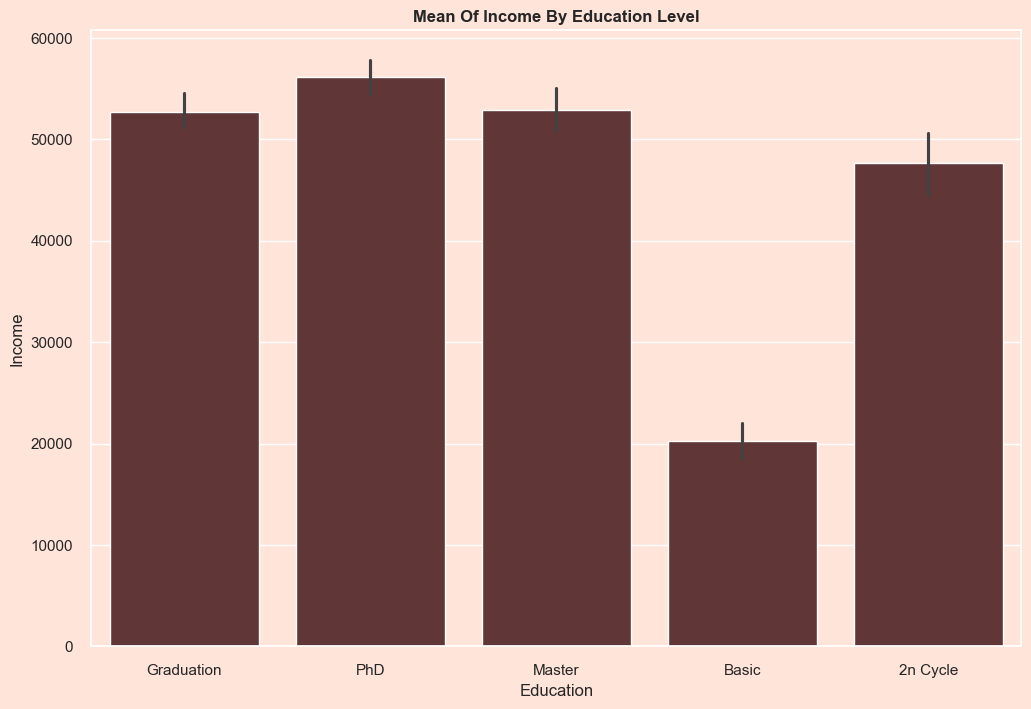

In [10]:
sns.barplot(x="Education", y="Income", data=df)
plt.title("mean of Income by Education level".title() , weight="bold")
plt.show()

### `Imputing by Sub-Group`

In [11]:
income_imputer = df.groupby("Education")["Income"].median().to_dict()
income_imputer

{'2n Cycle': 46805.0,
 'Basic': 20744.0,
 'Graduation': 52028.5,
 'Master': 50943.0,
 'PhD': 55212.0}

In [12]:
df["Income"] = df["Income"].fillna(df["Income"].map(income_imputer))

<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note : </b> i filled Missing Values in Income Column with median by Education Level as Sub-Group. i did it because there is outliers and Income varies depending on the level of education.</div>

### `Duplicated`

In [13]:
df.duplicated().sum()

np.int64(0)

<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:25%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note : </b> No Duplicate Values.. </div>

## <b>2.2 <span style='color:#682F2F'>Feature Engineering (Extraction) and Data Preparation</span></b>

In [14]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1704,7349,1973,Basic,Together,9722.0,1,0,2012-10-02,7,6,17,16,6,16,42,4,3,1,3,8,0,0,0,0,0,0,3,11,1
475,178,1956,Graduation,Married,62503.0,0,1,2013-02-18,40,478,0,193,110,75,117,4,8,3,11,5,0,0,0,0,0,0,3,11,0
1402,2534,1953,Graduation,Married,37716.0,0,1,2014-04-21,4,97,1,41,6,2,41,2,4,1,3,7,0,0,0,0,0,0,3,11,0
1976,5117,1963,2n Cycle,Married,32632.0,0,0,2012-08-02,32,63,151,137,153,19,53,2,4,4,8,5,0,0,0,0,0,0,3,11,0
1680,1215,1978,Graduation,Together,70440.0,0,0,2013-10-08,49,690,117,499,76,102,88,1,5,10,7,3,0,0,0,1,0,0,3,11,0


In [15]:
data = df.copy()

In [16]:
## age feature creation
data['Age'] = 2023 - data['Year_Birth']

In [17]:
## Spending feature creation
data['spending'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] \
                        + data['MntSweetProducts'] + data['MntGoldProds']

In [18]:
## Seniority feature creation
last_date = date(2023,9, 10)

def seniority(x):
    return last_date - x

data['Seniority'] = pd.to_numeric(data['Dt_Customer'].dt.date.apply(seniority).dt.days, downcast='integer')/365

In [19]:
## rename some cols
data=data.rename(columns={'NumWebPurchases': 'Web','NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})

In [20]:
data["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [21]:
## Matrial Status, i will  convert to 2 unique values .. 
## Alone ==> Divorced, Single, Absurd, Widow , YOLO.
## In couple ==> Married, Together.
data["Marital_Status"] = data['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})

In [22]:
data["Marital_Status"].nunique()

2

In [23]:
print(f"Education column number of unique value : {data['Education'].nunique()}")
print(f"Education column unique value : {data['Education'].unique()}")

Education column number of unique value : 5
Education column unique value : ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [24]:
data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [25]:
## Education column , i will  convert to 2 unique values .. 
## ungrad. ==> Basic, 2n Cycle .
## postgrad. ==> Graduation, Master, PhD.
data['Education']=data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

In [26]:
print(f"after update , Education column number of unique value : {data['Education'].nunique()}")
print(f"after update , Education column unique value : {data['Education'].unique()}")

after update , Education column number of unique value : 2
after update , Education column unique value : ['Postgraduate' 'Undergraduate']


In [27]:
print(f"num of unique value in kidhome : {data['Kidhome'].nunique()}")
print(f"num of unique value in Teenhome : {data['Teenhome'].nunique()}")

num of unique value in kidhome : 3
num of unique value in Teenhome : 3


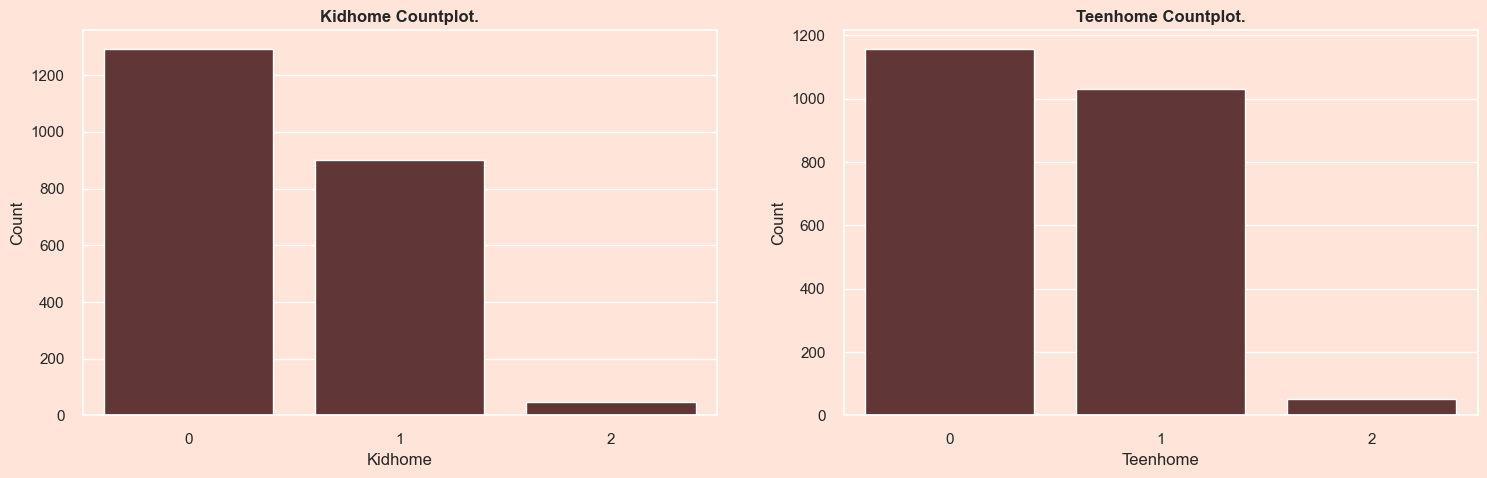

In [28]:
used_cols = ["Kidhome", "Teenhome"]

fig, ax = plt.subplots(1, 2, figsize = (18,5))

for i in range(2):
    sns.countplot(ax=ax[i], data=data, x=used_cols[i])
    ax[i].set_title(f"{used_cols[i]} Countplot.", weight="bold")
    ax[i].set_ylabel("Count")

plt.show()

In [29]:
## Children feature creation
data['Children'] = data['Kidhome'] + data['Teenhome']

In [30]:
def has_chid_or_no(x):
    if x > 0:
        return "Has child"
    else :
        return "no child"
    
data['Has_child'] = data["Children"].apply(has_chid_or_no)

In [31]:
data['Has_child'].value_counts()

Has_child
Has child    1602
no child      638
Name: count, dtype: int64

In [32]:
data['Children'].replace({3: "3 children",2:'2 children',1:'1 child',0:"No child"},inplace=True)

In [33]:
data['Children'].value_counts()

Children
1 child       1128
No child       638
2 children     421
3 children      53
Name: count, dtype: int64

In [34]:
## rename some cols
data = data.rename(columns={'MntWines': "Wines",
                            'MntFruits':'Fruits',
                            'MntMeatProducts':'Meat',
                            'MntFishProducts':'Fish',
                            'MntSweetProducts':'Sweets',
                            'MntGoldProds':'Gold',
                            'NumDealsPurchases':'Deals'})


In [35]:
data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].sample(5)
## Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
2229,0,0,0,0,0,0
391,0,0,0,0,0,0
519,1,0,0,0,1,0
1912,0,0,0,0,0,0
693,0,0,0,0,0,0


In [36]:
## Campaigns_Accepted feature creation
data['Campaigns_Accepted'] = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [37]:
data['Campaigns_Accepted'].value_counts().to_frame()

,count
Campaigns_Accepted,
0,1777
1,325
2,83
3,44
4,11


In [38]:
## drop some features
drop_list =['ID', 'Year_Birth' ,'Kidhome','Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact','Z_Revenue']
data.drop(drop_list, inplace=True, axis=1)
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web',
       'Catalog', 'Store', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'spending', 'Seniority', 'Children', 'Has_child', 'Campaigns_Accepted'],
      dtype='object')

In [39]:
## rename columns 
data.columns = data.columns.str.capitalize()

##### `NOW , We Have New Feature`

In [40]:
data.to_csv("output/02_data_cleaned.csv", index=False)

---------------